# Dummies and VIF with sklearn

The variance inflation factors (VIF) for all variables contained in data.

## Import the relevant libraries

In [80]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## Load the data

In [81]:
df = pd.read_csv("Real-life.csv")

## Preprocessing

### The descriptive statistics of the variables

In [82]:
df.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Determine the variables of interest

In [83]:
df = df.drop(["Model"],axis=1)

### Deal with missing values

In [84]:
df.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [85]:
df = df.dropna(axis=0)

In [86]:
df.describe(include="all")
#check the min, mean and max

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Exploring the PDFs

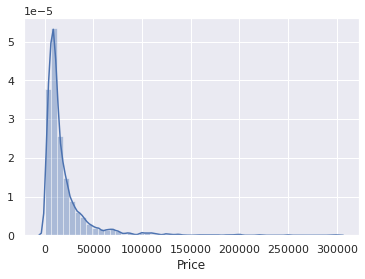

In [87]:
sns.distplot(df["Price"])
plt.show()

### Dealing with outliers

In [88]:
q = df['Price'].quantile(0.99)
df_1 = df[df['Price']<q]
df_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


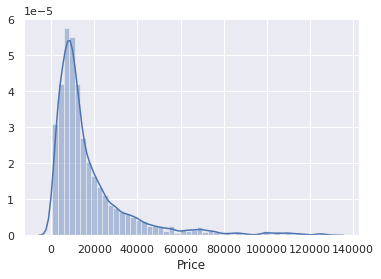

In [89]:
sns.distplot(df_1["Price"])
plt.show()

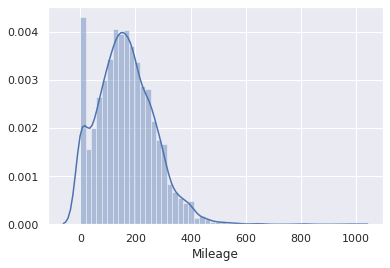

In [90]:
sns.distplot(df_1["Mileage"])
plt.show()

In [91]:
q = df_1["Mileage"].quantile(0.99)
df_1 = df_1[df_1["Mileage"]<q]
df_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3944,3944.000000,3944,3944.000000,3944.000000,3944,3944,3944.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,867,NaN,1511,NaN,NaN,1825,3576,NaN
mean,NaN,17933.880822,NaN,161.484026,2.747612,NaN,NaN,2006.389959
std,NaN,19008.212025,NaN,96.027108,4.980406,NaN,NaN,6.595986
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21376.250000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


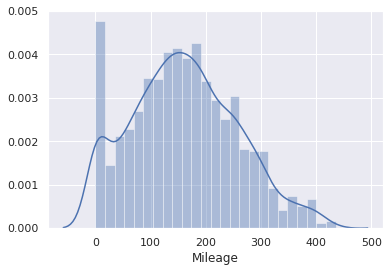

In [92]:
sns.distplot(df_1["Mileage"])
plt.show()

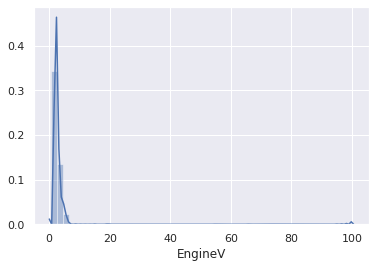

In [93]:
sns.distplot(df_1["EngineV"])
plt.show()

In [94]:
q = df_1["EngineV"].quantile(0.99)
df_1 = df_1[df_1["EngineV"]<q]
df_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3894,3894.000000,3894,3894.000000,3894.000000,3894,3894,3894.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,862,NaN,1483,NaN,NaN,1817,3532,NaN
mean,NaN,17823.805845,NaN,161.598100,2.417681,NaN,NaN,2006.397021
std,NaN,18919.010466,NaN,96.176488,0.896970,NaN,NaN,6.611338
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


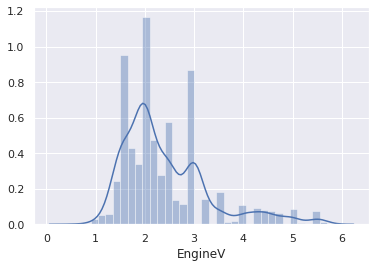

In [95]:
sns.distplot(df_1["EngineV"])
plt.show()

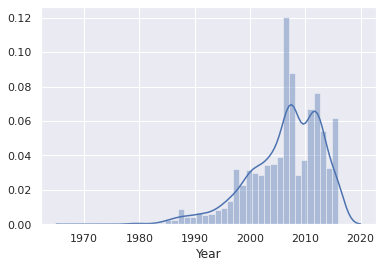

In [96]:
sns.distplot(df_1["Year"])
plt.show()

In [97]:
q = df_1["Year"].quantile(0.99)
df_1 = df_1[df_1["Year"]<q]
df_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3708,3708.000000,3708,3708.000000,3708.000000,3708,3708,3708.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,831,NaN,1437,NaN,NaN,1693,3346,NaN
mean,NaN,15767.552424,NaN,169.627023,2.419752,NaN,NaN,2005.915318
std,NaN,15267.497313,NaN,91.448298,0.900080,NaN,NaN,6.406544
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6900.000000,NaN,102.000000,1.800000,NaN,NaN,2002.000000
50%,NaN,10900.000000,NaN,162.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,19125.000000,NaN,231.000000,3.000000,NaN,NaN,2011.000000


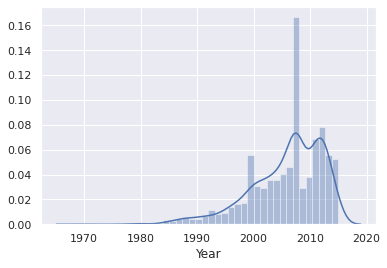

In [98]:
sns.distplot(df_1["Year"])
plt.show()

In [99]:
df = df_1
df = df.reset_index(drop=True)

In [100]:
df.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3708,3708.000000,3708,3708.000000,3708.000000,3708,3708,3708.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,831,NaN,1437,NaN,NaN,1693,3346,NaN
mean,NaN,15767.552424,NaN,169.627023,2.419752,NaN,NaN,2005.915318
std,NaN,15267.497313,NaN,91.448298,0.900080,NaN,NaN,6.406544
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6900.000000,NaN,102.000000,1.800000,NaN,NaN,2002.000000
50%,NaN,10900.000000,NaN,162.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,19125.000000,NaN,231.000000,3.000000,NaN,NaN,2011.000000


## Check the OLS assumptions

## Check for linearities

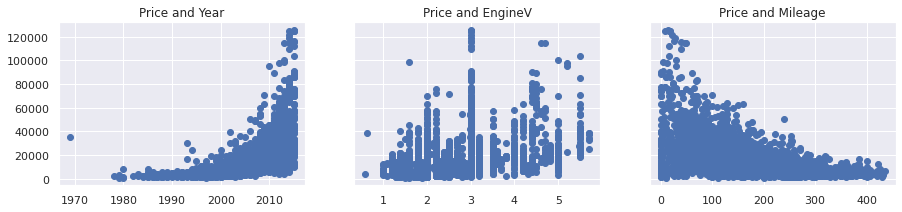

In [101]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(df['Year'],df['Price'])
ax1.set_title('Price and Year')
ax2.scatter(df['EngineV'],df['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(df['Mileage'],df['Price'])
ax3.set_title('Price and Mileage')
plt.show()

Price is not normally distributed

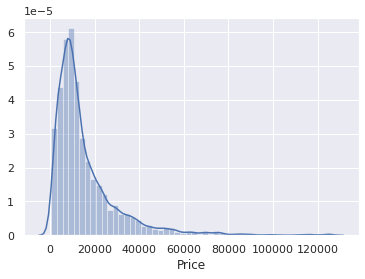

In [102]:
sns.distplot(df_1["Price"])
plt.show()

### Relaxing the assumptions

Log transformation (df["Price]) to deal with exponential scatter plots

In [103]:
log_price = np.log(df["Price"])
df["Log_Price"] = log_price

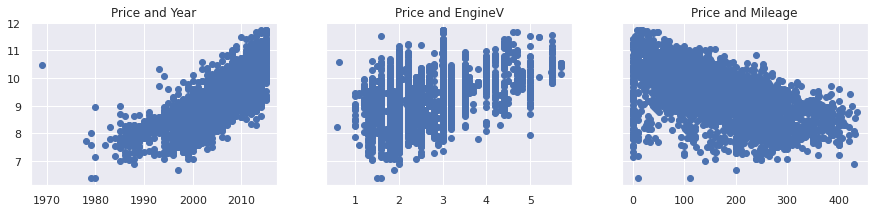

In [104]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(df['Year'],df['Log_Price'])
ax1.set_title('Price and Year')
ax2.scatter(df['EngineV'],df['Log_Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(df['Mileage'],df['Log_Price'])
ax3.set_title('Price and Mileage')
plt.show()
#Homoscedascity holds as we can see in the graphs, since we've already implemented de log transformation
#No autocorrelation

In [105]:
df = df.drop(["Price"], axis=1)

In [106]:
df.describe(include="all")

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Log_Price
count,3708,3708,3708.000000,3708.000000,3708,3708,3708.000000,3708.000000
unique,7,6,NaN,NaN,4,2,NaN,NaN
top,Volkswagen,sedan,NaN,NaN,Diesel,yes,NaN,NaN
freq,831,1437,NaN,NaN,1693,3346,NaN,NaN
mean,NaN,NaN,169.627023,2.419752,NaN,NaN,2005.915318,9.315536
std,NaN,NaN,91.448298,0.900080,NaN,NaN,6.406544,0.841242
min,NaN,NaN,0.000000,0.600000,NaN,NaN,1969.000000,6.396930
25%,NaN,NaN,102.000000,1.800000,NaN,NaN,2002.000000,8.839277
50%,NaN,NaN,162.000000,2.200000,NaN,NaN,2007.000000,9.296518
75%,NaN,NaN,231.000000,3.000000,NaN,NaN,2011.000000,9.858749


### Multicollinearity

Mileage and Year should have it

In [107]:
df.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Log_Price'], dtype=object)

In [108]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = df[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [109]:
vif
# VIF = 1 : no multicollinearity
# VIF >> 5 : unacceptable

,VIF,features
0,4.410208,Mileage
1,11.452080,Year
2,8.232058,EngineV


In [110]:
df = df.drop("Year", axis = 1)

## Create dummy variables

In [113]:
df_dummies = pd.get_dummies(df, drop_first= True)

In [114]:
df_dummies

,Mileage,EngineV,Log_Price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3703,35,1.6,9.792556,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3704,9,3.0,11.736069,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3705,1,3.5,8.779557,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
3706,194,2.0,8.987197,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


### Rearrange a bit

In [117]:
df_dummies.columns.values

array(['Mileage', 'EngineV', 'Log_Price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [118]:
cols=['Log_Price','Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [120]:
df_preprocessed = df_dummies[cols]
df_preprocessed.iloc[1]

Log_Price                8.974618
Mileage                427.000000
EngineV                  2.900000
Brand_BMW                0.000000
Brand_Mercedes-Benz      1.000000
Brand_Mitsubishi         0.000000
Brand_Renault            0.000000
Brand_Toyota             0.000000
Brand_Volkswagen         0.000000
Body_hatch               0.000000
Body_other               0.000000
Body_sedan               0.000000
Body_vagon               0.000000
Body_van                 1.000000
Engine Type_Gas          0.000000
Engine Type_Other        0.000000
Engine Type_Petrol       0.000000
Registration_yes         1.000000
Name: 1, dtype: float64

# Variance inflation factors for all variables contained in df_preprocessed

"Log_Price" is linearly correlated with all other variables.
"EngineV" and "Registration_yes" have high vif and could also be removed.


In [121]:
variables = df_preprocessed
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [122]:
vif

,VIF,features
0,45.651014,Log_Price
1,4.995008,Mileage
2,15.203154,EngineV
3,2.541457,Brand_BMW
4,2.980892,Brand_Mercedes-Benz
5,1.834709,Brand_Mitsubishi
6,2.300681,Brand_Renault
7,2.386479,Brand_Toyota
8,3.337562,Brand_Volkswagen
9,1.677690,Body_hatch


In [123]:
variables = df_preprocessed.drop(["Log_Price"],axis=1)
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [124]:
vif

,VIF,features
0,4.991129,Mileage
1,8.225087,EngineV
2,2.324795,Brand_BMW
3,2.834127,Brand_Mercedes-Benz
4,1.649004,Brand_Mitsubishi
5,2.110538,Brand_Renault
6,2.156916,Brand_Toyota
7,2.897013,Brand_Volkswagen
8,1.521883,Body_hatch
9,1.572947,Body_other
